In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage.io as io
import cv2

In [2]:
# Directories containing images
dataDir = 'images'
annDir = 'val'
fileLabel = 'ILSVRC2012_devkit_t12/data/ILSVRC2012_validation_ground_truth.txt'
fileLabelNames = 'labelNames.txt'
fileImageNetNames = 'ImageNetLabels.txt'

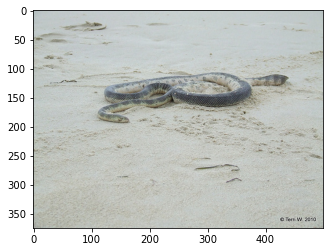

In [62]:
fileName = 'ILSVRC2012_val_00000001.JPEG'
I = io.imread( '%s/%s'%(dataDir,fileName) )

plt.imshow(I)
plt.show()

In [87]:
IMG_SIZE = [ 227, 227 ]
image = I
image = tf.image.resize( image, IMG_SIZE )
image /= 255
image = image.numpy()   # Bring back to np.array

In [94]:
def gaussianPyramid( image, sig_o ):

    pyramid = [ image ]
    sig = sig_o
    for _ in range(3):

        image = applyGauss( image, sig )
        pyramid.append( cv2.pyrUp(image) )    # Resize image to size of original
        sig = 2*sig

    return pyramid

def applyGauss( image, sig ):

    # Apply Gaussian blur
    ksize = (0,0)   # Kernel size is computed from sig values
    sigX = sig
    sigY = 0        # sigY uses sigX
    image = cv2.GaussianBlur( image, ksize, sigX, sigY )

    # Downsample
    image = cv2.pyrDown(image)

    return image

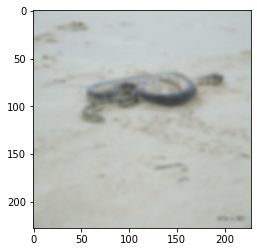

In [99]:
img = image
pyramid = gaussianPyramid( img, 1 )
# img = cv2.pyrUp(img)
# img = cv2.pyrDown(img)
plt.imshow(pyramid[-3])
plt.show()